In [8]:
! pip install -r requirements_versions.txt

In [7]:
! python simclr_module.py --batch_size=256 --dataset="cifar100" --fast_dev_run=0 --gpus=1 --gamma=1 --jitter_strength=0.5 --loss_type="product" --max_epochs=200 --optimizer="lars" --online_ft

/Users/maxharnot/anaconda3/envs/ADSE/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:35: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/Users/maxharnot/anaconda3/envs/ADSE/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:93: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task

In [7]:
%load_ext autoreload
%autoreload 2

from visualisation_utils import plot_all_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
results = plot_all_results(results_path='results_finetune_50epochs', results=[])

concatenation_kernel cifar10 dict_keys(['test_loss', 'test_acc', 'epoch'])
experiment_name='concatenation_kernel', dataset='cifar10'
 'Key train_loss was not found in Reservoir'
exponential_kernel cifar100 dict_keys(['test_loss', 'test_acc', 'epoch'])
experiment_name='exponential_kernel', dataset='cifar100'
 'Key train_loss was not found in Reservoir'
laplacian_kernel cifar100 dict_keys(['train_loss', 'train_acc_step', 'train_acc_epoch', 'epoch', 'val_loss', 'val_acc'])
experiment_name='laplacian_kernel', dataset='cifar100'
 'Key online_train_acc was not found in Reservoir'
laplacian_kernel cifar10 dict_keys(['test_loss', 'test_acc', 'epoch'])
experiment_name='laplacian_kernel', dataset='cifar10'
 'Key train_loss was not found in Reservoir'
simclr_reproduction cifar100 dict_keys(['test_loss', 'test_acc', 'epoch'])
experiment_name='simclr_reproduction', dataset='cifar100'
 'Key train_loss was not found in Reservoir'
simclr_reproduction cifar10 dict_keys(['test_loss', 'test_acc', 'epoch'

# Old

In [1]:
%load_ext autoreload
%autoreload 2

from visualisation_utils import plot_results
from pathlib import Path

RESULTS_PATH = Path('results_finetune_200epochs')

In [ ]:
results_dir = RESULTS_PATH
experiment_name = 'concatenattion

log_dir = os.path.join(results_dir, experiment_name, dataset)

# Define the path to the log directory
event_file = next((f for f in os.listdir(log_dir) if f.startswith("events.out.tfevents")), None)

# Extract data from TensorBoard event file
event_acc = event_accumulator.EventAccumulator(os.path.join(log_dir, event_file))
event_acc.Reload()

# Function to extract scalar data
def get_scalars(event_acc, key):
    events = event_acc.Scalars(key)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    return pd.DataFrame({"step": steps, "value": values})

# Extract relevant metrics
train_loss = get_scalars(event_acc, 'train_loss')
val_loss = get_scalars(event_acc, 'val_loss')
train_acc = get_scalars(event_acc, 'online_train_acc')
val_acc = get_scalars(event_acc, 'online_val_acc')

# Average training results to match validation frequency
val_steps = val_loss['step'].values
train_loss_avg = train_loss.groupby(train_loss['step'] // val_steps[1]).mean()
train_acc_avg = train_acc.groupby(train_acc['step'] // val_steps[1]).mean()

# Calculate the standard deviation for error bands
train_loss_std = train_loss.groupby(train_loss['step'] // val_steps[1]).std()
train_acc_std = train_acc.groupby(train_acc['step'] // val_steps[1]).std()

# Summary of results
last_train_loss = round(train_loss.iloc[-1]['value'], 5)
last_val_loss = round(val_loss.iloc[-1]['value'], 5)
last_train_acc = round(100 * train_acc.iloc[-1]['value'], 2)
last_val_acc = round(100 * val_acc.iloc[-1]['value'], 2)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot training and validation loss with error bands
axs[0].plot(train_loss_avg.index * val_steps[1], train_loss_avg['value'], label='Train Loss')
axs[0].fill_between(train_loss_avg.index * val_steps[1],
                    train_loss_avg['value'] - train_loss_std['value'],
                    train_loss_avg['value'] + train_loss_std['value'], alpha=0.2)
axs[0].plot(val_loss['step'], val_loss['value'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title(f'Loss history (Train: {last_train_loss}, Val: {last_val_loss})')
axs[0].legend()

# Adjust x-ticks for loss plot
xticks = np.arange(0, val_steps[-1] + val_steps[1], val_steps[1] * 5)
axs[0].set_xticks(xticks)
axs[0].set_xticklabels(xticks // val_steps[0])

# Plot training and validation accuracy with error bands
axs[1].plot(train_acc_avg.index * val_steps[1], train_acc_avg['value'], label='Train Accuracy')
axs[1].fill_between(train_acc_avg.index * val_steps[1],
                    train_acc_avg['value'] - train_acc_std['value'],
                    train_acc_avg['value'] + train_acc_std['value'], alpha=0.2)
axs[1].plot(val_acc['step'], val_acc['value'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title(f'Accuracy history (Train: {last_train_acc}%, Val: {last_val_acc}%)')
axs[1].legend()

# Adjust x-ticks for accuracy plot
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticks // val_steps[0])

# Set the overall title and subtitle
fig.suptitle(f'Model: {experiment_name} Dataset: {dataset}')

# Show the plot
plt.show()

return last_val_acc

[    0    10    20 ... 35180 35190 35200]


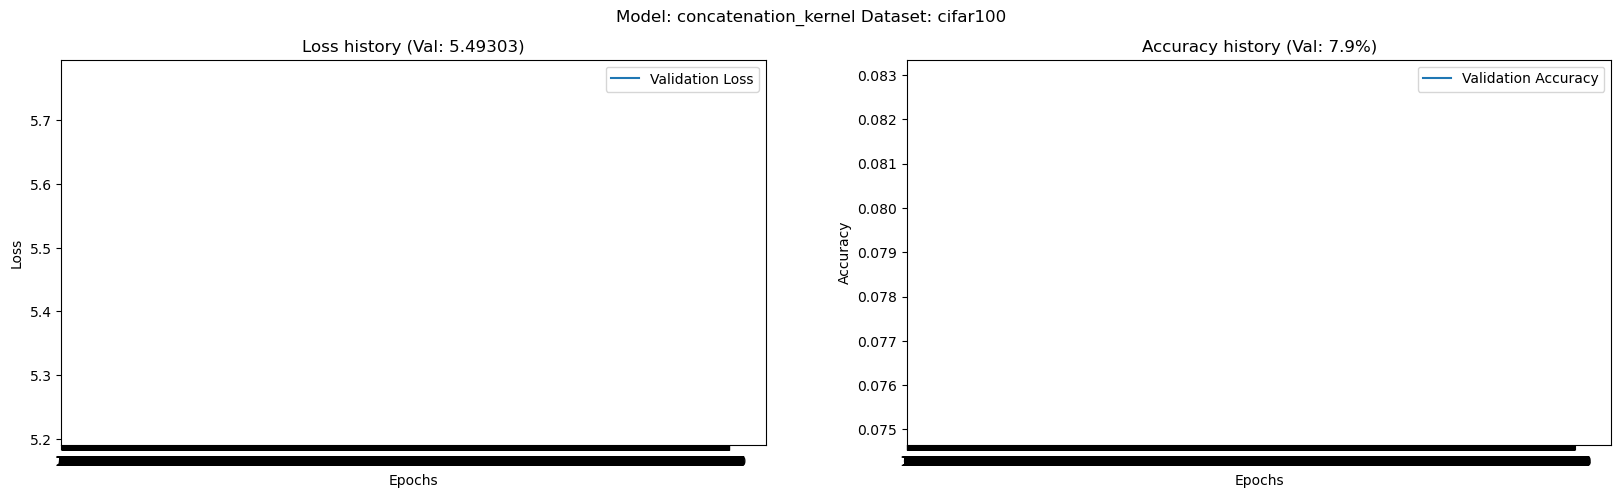

[    0    10    20 ... 31370 31380 31390]


KeyboardInterrupt: 

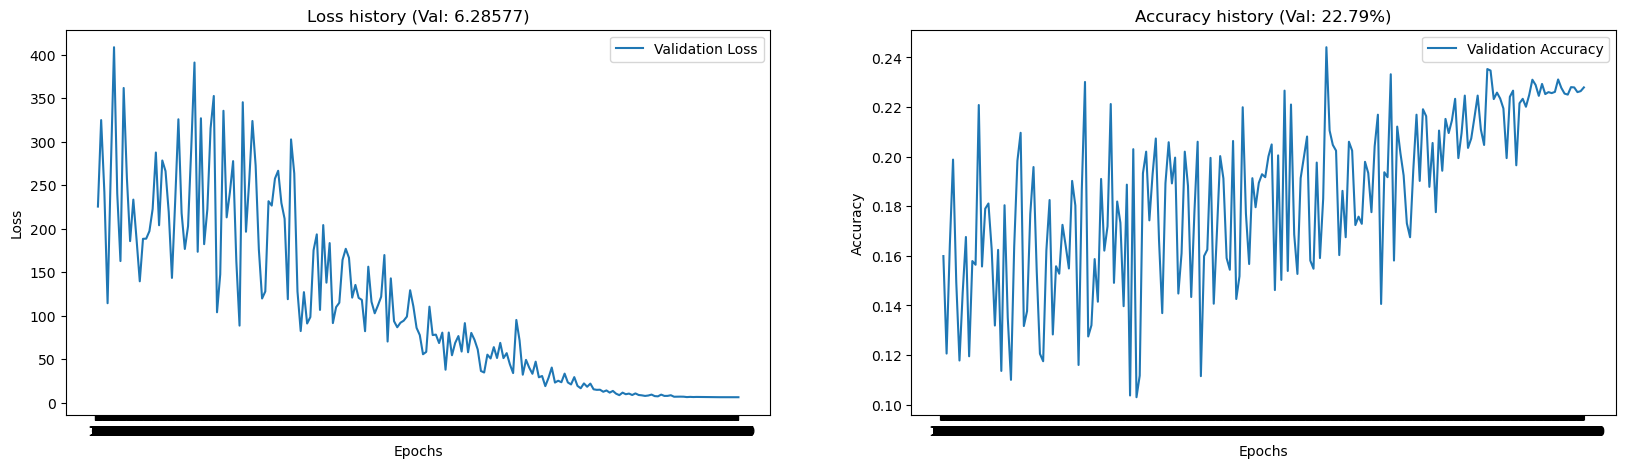

In [2]:
experiment_dirs = [path for path in RESULTS_PATH.glob("*") if not str(path.stem).startswith('.')]
for experiment_dir in experiment_dirs:
    dataset_dirs = [path for path in experiment_dir.glob("*") if not str(path.stem).startswith('.')]
    for dataset_dir in dataset_dirs:
        experiment_name = str(experiment_dir.stem)
        dataset = str(dataset_dir.stem)
        plot_results(experiment_name=experiment_name, dataset=dataset, results_dir=str(RESULTS_PATH))

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
from pathlib import Path

for RESULTS_PATH in [Path('results_finetune_200epochs'), Path('results_finetune_50epochs')]:
    print(RESULTS_PATH)
    experiment_dirs = [path for path in RESULTS_PATH.glob("*") if not str(path.stem).startswith('.')]
    for experiment_dir in experiment_dirs:
        dataset_dirs = [path for path in experiment_dir.glob("*") if not str(path.stem).startswith('.')]
        for dataset_dir in dataset_dirs:
            experiment_name = str(experiment_dir.stem)
            dataset = str(dataset_dir.stem)
            results_dir = RESULTS_PATH
            log_dir = os.path.join(results_dir, experiment_name, dataset)
            
            # Define the path to the log directory
            event_file = next((f for f in os.listdir(log_dir) if f.startswith("events.out.tfevents")), None)
            
            # Extract data from TensorBoard event file
            event_acc = event_accumulator.EventAccumulator(os.path.join(log_dir, event_file))
            event_acc.Reload()
            
            print(experiment_name, dataset, event_acc.scalars._buckets.keys())

results_finetune_200epochs
concatenation_kernel cifar100 dict_keys(['test_loss', 'test_acc', 'epoch'])
concatenation_kernel cifar10 dict_keys(['train_loss', 'train_acc_step', 'train_acc_epoch', 'epoch', 'val_loss', 'val_acc'])
exponential_kernel cifar100 dict_keys(['train_loss', 'train_acc_step', 'train_acc_epoch', 'epoch', 'val_loss', 'val_acc'])
exponential_kernel cifar10 dict_keys(['test_loss', 'test_acc', 'epoch'])
simple_sum_kernel cifar100 dict_keys(['test_loss', 'test_acc', 'epoch'])
simple_sum_kernel cifar10 dict_keys(['test_loss', 'test_acc', 'epoch'])
laplacian_kernel cifar100 dict_keys(['train_loss', 'train_acc_step', 'train_acc_epoch', 'epoch', 'val_loss', 'val_acc'])
laplacian_kernel cifar10 dict_keys(['train_loss', 'train_acc_step', 'train_acc_epoch', 'epoch', 'val_loss', 'val_acc'])
simclr_reproduction cifar100 dict_keys(['train_loss', 'train_acc_step', 'train_acc_epoch', 'epoch', 'val_loss', 'val_acc'])
simclr_reproduction cifar10 dict_keys(['train_loss', 'train_acc_ste

In [ ]:
experiment_dirs = [path for path in RESULTS_PATH.glob("*") if not str(path.stem).startswith('.')]
for experiment_dir in experiment_dirs:
    dataset_dirs = [path for path in experiment_dir.glob("*") if not str(path.stem).startswith('.')]
    for dataset_dir in dataset_dirs:
        experiment_name = str(experiment_dir.stem)
        dataset = str(dataset_dir.stem)
        if (
            (experiment_name == 'concatenation_kernel' and dataset == 'cifar100') or 
            (experiment_name == 'exponential_kernel' and dataset == 'cifar10') or 
            (experiment_name == 'simple_sum_kernel' and dataset == 'cifar100') or 
            (experiment_name == 'simple_sum_kernel' and dataset == 'cifar10')
        ):
            continue
        plot_results(experiment_name=experiment_name, dataset=dataset, results_dir=str(RESULTS_PATH))